In [1]:
print('딥러닝 시작!')

# 실행 단축키: ctrl + enter (현재 셀 실행, 커서는 그대로 멈춤)
#              shift + enter (현재 셀 실행하고 커서를 다음 셀로 이동)

딥러닝 시작!


In [ ]:
# 셀 아래로 추가 ctrl + m + b
# 셀 위로 추가 ctrl + m + a
# 셀 삭제 ctrl + m + d
# 셀 삭제 다시 되돌리기 ctrl + m + z
# 마크다운 전환 ctrl + m + m (m 꾹 누르면)
# 코드 모드 전환(에디트 모드) ctrl + m + y
# 동일 단어 한꺼번에 선택 ctrl + shift + l(엘)

In [3]:
# 내 드라이브 > 코랩 폴더 > 딥러닝 > 데이터 폴더 > 데이터 파일 접근
# 데이터 접근 쉽게 할 수 있게 경로 변경
%pwd
# /content 구글 드라이브 보다 최상단의 개념
#
# pd.read_csv('/content/drive/MyDrive/Colab Notebooks/24.03.25 DeepLearning(원호)/data/student-mat.csv')
# 경로 이동
%cd /content/drive/MyDrive/Colab Notebooks/24.03.25 DeepLearning(원호)

/content/drive/MyDrive/Colab Notebooks/24.03.25 DeepLearning(원호)


### 목표
 - 학생 수학 성적 데이터를 활용하여 수치(값)을 예측하는 회귀 모델을 만들어보자!
 - tensorflow.keras 활용해서 인공 신경망 모델을 구성하는 방법을 살펴보자!

In [5]:
# 환경셋팅
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split # 훈련, 테스트 분리하는 도구
import tensorflow as tf
print(tf.__version__) # 언더바 두개씩(던더), 라이브러리 버전 확인 코드

2.15.0


In [6]:
# 데이터 불러오기
# , -> 구분자 = ';'
data = pd.read_csv('./data/student-mat.csv', delimiter = ';')

# 전체 정보 확인
data.info()
# 크기
# 결측치 확인
# 데이터 타입
# 특성 이름
# studytime 문제(특성1개), G3 답(수치형태 Label)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

#### 데이터 분리
 - X: 공부시간(1차원), y:G3(1차원) 컬럼 분리
 - 훈련셋, 테스트셋 분리
    - train_test_split()
    - 7:3, rd:3
    - X_train, X_test, y_train, y_test
    - 크기확인

In [7]:
X = data['studytime']
y = data['G3']    #data.iloc[:,-1]

X.shape, y.shape

((395,), (395,))

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3 ,
                                                    random_state = 3)

print('훈련용:', X_train.shape, y_train.shape)
print('테스트용:', X_test.shape, y_test.shape)

훈련용: (276,) (276,)
테스트용: (119,) (119,)


In [14]:
# 데이터 탐색
X_train.unique()
np.unique(X_train, return_counts= True)

(array([1, 2, 3, 4]), array([ 76, 142,  41,  17]))

In [15]:
y_train.unique()
np.unique(y_train, return_counts = True)

(array([ 0,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
 array([26,  1,  5, 11,  8, 23, 20, 44, 28, 19, 23, 18, 23, 10,  3, 10,  4]))

#### 신경망 모델 생성
 - 1. 모델 구조 설계
 - 2. 모델 학습 / 평가 방법 설정: 컴파일
 - 3. 모델 학습 / 학습 현황 시각화
 - 4. 모델 예측 / 평가

In [16]:
# 딥러닝 구현 도구 불러오기
# tensorflow > keras
# 뼈대 구축 도구
from tensorflow.keras import Sequential
# 층 내용 정의 도구
from tensorflow.keras.layers import Dense, Activation
# Dense: 신경망층을 구성하는 함수
# Activation: 활성화 함수(추상적, 뉴런을 거쳐 나온 y를 변형하는 함수)

In [19]:
# 1. 모델 구조 설계
# 뼈대 구축
model = Sequential()

# 층 내용 정의
# 입력층1 + 중간층1
# units : 뉴런(선형모델 y=wx+b) 개수 설정
# Activation: 활성화 함수>> 뉴런 뽑힌 값을 해당 함수로 입력하여 출력결과를 다음층으로 전달
model.add(Dense(units = 4, input_dim = 1))
model.add(Activation('sigmoid'))

# model.add(Dense(units = 8))
# model.add(Activation('sigmoid'))
# model.add(Dense(units = 16))
# model.add(Activation('sigmoid'))
# model.add(Dense(units = 8))
# model.add(Activation('sigmoid'))

# 출력층
model.add(Dense(units = 1))
# model.add(Activation('linear')) # 선형함수, 항등함수, 생략가능

# 모델 정보 요약
# 모델의 복잡도 파악이 됨
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 4)                 8         
                                                                 
 activation_2 (Activation)   (None, 4)                 0         
                                                                 
 dense_5 (Dense)             (None, 1)                 5         
                                                                 
Total params: 13 (52.00 Byte)
Trainable params: 13 (52.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
# 2. 모델 학습/ 평가 방법 설정 (컴파일 compile)
# 모델명.compile()
# 분류? 회귀?
# 회귀 맞춰서 내용 설정
# loss(손실함수, cost비용함수) = 회귀에 맞게
# optimizer(최적화함수) = 경사하강 종류(sgd 기본적인 공식)
# 분류 > metrics(평가지표) = ['accuracy']
model.compile(loss = 'mse', # 오차 계산 공식: 평균제곱오차
              optimizer = 'sgd') # 경사하강법 종류 중 1: 확률적 경사 하강법
                                # 최적의 w,b를 찾기 위한 도구


In [21]:
# 3. 모델 학습(fit) 및 시각화(plt- plot)
# 학습 현황 변수에 담을 수 있음 (대입)
# 300번 정도 반복 진행
h = model.fit(X_train, y_train, epochs = 300)

Epoch 1/300
9/9 [==============================] - 1s 4ms/step - loss: 90.0698
Epoch 2/300
9/9 [==============================] - 0s 3ms/step - loss: 40.7463
Epoch 3/300
9/9 [==============================] - 0s 2ms/step - loss: 24.8238
Epoch 4/300
9/9 [==============================] - 0s 2ms/step - loss: 21.4636
Epoch 5/300
9/9 [==============================] - 0s 2ms/step - loss: 20.8187
Epoch 6/300
9/9 [==============================] - 0s 2ms/step - loss: 20.7350
Epoch 7/300
9/9 [==============================] - 0s 3ms/step - loss: 20.7226
Epoch 8/300
9/9 [==============================] - 0s 2ms/step - loss: 20.7127
Epoch 9/300
9/9 [==============================] - 0s 3ms/step - loss: 20.7287
Epoch 10/300
9/9 [==============================] - 0s 3ms/step - loss: 20.7115
Epoch 11/300
9/9 [==============================] - 0s 3ms/step - loss: 20.7433
Epoch 12/300
9/9 [==============================] - 0s 2ms/step - loss: 20.7123
Epoch 13/300
9/9 [==============================]

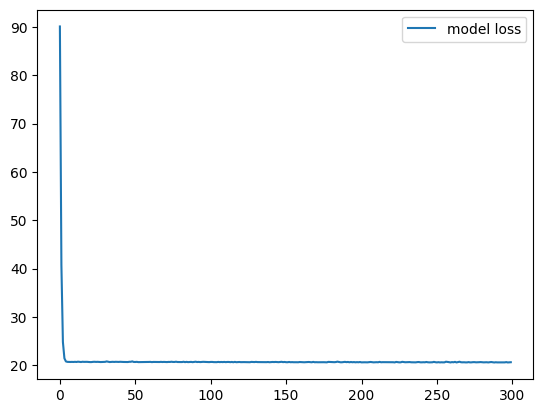

In [24]:
plt.plot(h.history['loss'], label='model loss')
plt.legend()
plt.show()

# 시작 오차 다른 이유: y=wx+b 안에 w,b값이 초반에는 랜덤하게 셋팅함
# 몇번 반복만에 바로 성능이 20이라는 오차를 출력하게 됨 > 빠르게 학습하게됨> 딥러닝 장점
# 특성 한개만 있기때문에 성능이 무조건 좋다고 말할 수는 없는 상황
# 딥러닝 모델 생성 및 학습 순서
# 1. 모델 뼈대 구축 + 층 내용 정의
# 2. 학습 / 평가 방법 설정
# 3. 학습 + 시각화
# 4. 평가 + 예측

In [26]:
# 모델 예측
# predict
model.predict(X_test)[:,0]

4/4 [==============================] - 0s 7ms/step


array([10.458185, 10.9032  , 10.9032  , 10.458185, 10.9032  ,  9.920056,
       10.458185, 11.25907 ,  9.920056,  9.920056,  9.920056, 10.458185,
       10.458185, 10.9032  , 11.25907 , 10.9032  , 10.9032  , 10.458185,
       10.458185, 10.9032  , 10.458185, 10.458185,  9.920056, 10.458185,
        9.920056, 10.458185, 10.458185,  9.920056, 10.458185, 10.9032  ,
       11.25907 ,  9.920056, 10.9032  ,  9.920056, 10.9032  , 10.458185,
       10.458185,  9.920056, 10.458185, 10.9032  , 10.458185, 10.458185,
       10.458185, 10.458185, 10.458185, 11.25907 , 10.9032  ,  9.920056,
        9.920056,  9.920056, 10.458185,  9.920056, 10.9032  ,  9.920056,
        9.920056, 11.25907 ,  9.920056, 10.458185, 10.458185, 10.9032  ,
        9.920056, 10.458185, 10.458185, 10.9032  ,  9.920056, 10.458185,
       10.458185, 11.25907 , 10.458185, 10.9032  , 10.458185,  9.920056,
       10.458185,  9.920056, 10.458185, 10.458185, 10.458185, 10.458185,
       10.458185, 10.458185, 10.458185, 10.458185, 

In [27]:
# 모델 평가
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 8ms/step - loss: 21.0902


21.090229034423828